# Importing modules and dataset

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.read_csv('breast-cancer-wisconsin.data',header=None)
data_beta = pd.read_csv('breast-cancer-wisconsin.data',header=None)

# Dataset preprocessing

In [2]:
data.rename(columns = {0: "id number", 1: "Clump Thickness", 2: "Uniformity of Cell Size",
                       3: "Uniformity of Cell Shape", 4: "Marginal Adhesion", 5: "Single Epithelial Cell Size",
                       6: "Bare Nuclei", 7: "Bland Chromatin", 8: "Normal Nucleoli",
                       9: "Mitoses", 10: "Class"}, inplace = True) 
data

,id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [3]:
dataset = pd.DataFrame()

In [4]:
for i in range(1,11):
    dataset[i] = data_beta.loc[:,i]

dataset[10] = dataset[10].replace([2,4],[0,1])    
dataset

,1,2,3,4,5,6,7,8,9,10
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,0
695,2,1,1,1,2,1,1,1,1,0
696,5,10,10,3,7,3,8,10,2,1
697,4,8,6,4,3,4,10,6,1,1


In [5]:
mean,cnt = 0,0
for i in range(len(dataset[6])):
    if(dataset[6][i] != '?'):
        mean += int(dataset[6][i])
        cnt += 1
        
mean = mean/cnt
dataset[6] = dataset[6].replace('?',str(mean))
dataset[6] = pd.to_numeric(dataset[6])
    


In [6]:
dataset[6] = pd.to_numeric(dataset[6],downcast='float')


# Data Visualization

Benign and Malignant ratio


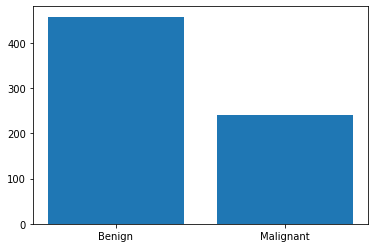

In [7]:
print("Benign and Malignant ratio")
a = dataset[10].value_counts(dropna=False)
plt.bar(['Benign','Malignant'],[a[0],a[1]])
plt.show()

Correlation between features


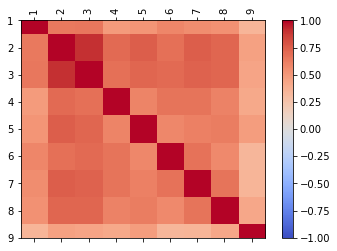

In [8]:
print("Correlation between features")
data = dataset.loc[:,1:9]
corr = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

# Train/Test split

In [9]:
train_split = 0.8
val_split = 0.2
idx = dataset.index.values.astype(int)

np.random.seed(275)  
np.random.shuffle(idx)

x_train = np.empty((0,9))
y_train = np.empty((0,1))
x_val = np.empty((0,9))
y_val = np.empty((0,1))

train_cnt = round(0.8*len(idx))
val_cnt = round(0.2*len(idx))


for i in range(0,train_cnt):
    x = np.array(dataset.loc[idx[i],1:9])
    x_train = np.append( x_train,[x],axis=0 )
    y_train = np.append( y_train,dataset.loc[idx[i],10] )

for i in range(train_cnt,len(idx)):
    x = np.array(dataset.loc[idx[i],1:9])
    x_val = np.append(x_val,[x],axis=0 )
    y_val = np.append(y_val,dataset.loc[idx[i],10])



# Implementation of Logistic Regression

In [10]:
def data_divide(xval,yval):
    xval = np.insert(xval,[0],1,axis=1)
    y = np.ones([len(yval),1])
    for i in range(len(yval)):
        y[i] = yval[i]
    return xval,y

x_val,y_val = data_divide(x_val,y_val)

In [11]:
def y_prediction(theta,xval):
    theta = np.transpose(theta)
    y_p = np.matmul(xval,theta)
    y_p = 1/(1+np.exp(-y_p))
    a = lambda x : 1 if x>=0.5 else 0
    y_p = [a(y_p[i][0]) for i in range(len(y_p))]
    return y_p
  

In [12]:
def error_calculation(X,Y,theta):
    theta = np.transpose(theta)
    y_p = np.matmul(X,theta)
    y_p = 1/(1+np.exp(-y_p))
    err = (y_p-Y)
    return np.transpose(err)

In [13]:
def gradient_descent(X,Y):
    theta = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])
    alpha = 0.0001
    m = len(X)
    for i in range(0,100000):
        err = (error_calculation(X,Y,theta))
        theta = theta - alpha*((np.matmul(err,X))/m)
    return theta

In [14]:
xt,yt = data_divide(x_train,y_train)
theta = gradient_descent(xt,yt)

# Accuracy

In [15]:
y_predict = y_prediction(theta,x_val)

In [16]:
from sklearn.metrics import confusion_matrix
def confusion_matrix():
    TP,TN,FP,FN = 0,0,0,0
    for i in range(len(y_val)):
        if(y_predict[i]==1 and y_val[i]==1):
            TP += 1
        elif(y_predict[i]==1 and y_val[i]==0):
            FP += 1
        elif(y_predict[i]==0 and y_val[i]==1):
            FN += 1
        elif(y_predict[i]==0 and y_val[i]==0):
            TN += 1
    accuracy = ((TP+TN)/(TP+TN+FP+FN))*100
    precision = (TP/(TP+FP))*100
    recall = (TP/(TP+FN))*100
    print("Accuracy "+str(accuracy))
    print("Precision "+str(precision))
    print("Recall "+str(recall))
    return TP,TN,FP,FN
    
TP,TN,FP,FN = confusion_matrix()

Accuracy 95.71428571428572
Precision 90.74074074074075
Recall 98.0


### Accuracy  95.71428571428572